In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [2]:
simulator = QasmSimulator() #gasm simulator
circuit = QuantumCircuit(2, 2) #q register


In [3]:
circuit.h(0) # ворота Адамара, создает суперпозицию
circuit.cx(0, 1) # приводит кубиты в запутнное состояние 
circuit.measure([0,1], [0,1]) # сохраняет результаты в i-м кубите 

In [4]:
circuit.draw() # схема нашей схемы

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [5]:
simulator = QasmSimulator()
complited_circuit = transpile(circuit, simulator)
job = simulator.run(complited_circuit, shots = 2500)
result = job.result()
counts = result.get_counts(circuit)
print("\Total count for 00 and 11 are:\n", counts)


\Total count for 00 and 11 are:
 {'00': 1241, '11': 1259}


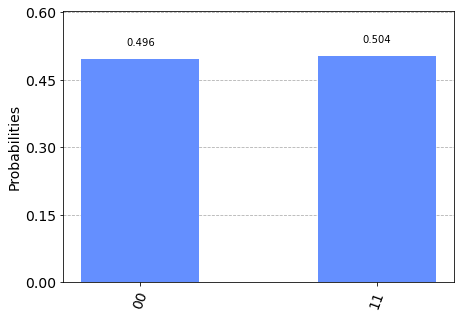

In [6]:
plot_histogram(counts)

In [7]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from qiskit_textbook.widgets import binary_widget

In [8]:
binary_widget(nbits=9213)

HTML(value='<pre>Binary      Decimal\n 0000000000 = 0</pre>')

In [9]:
n = 8
n_q = n
n_b = n 
qc_output = QuantumCircuit(n_q, n_b)

In [10]:
for j in range(n):
    qc_output.measure(j, j)

In [11]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

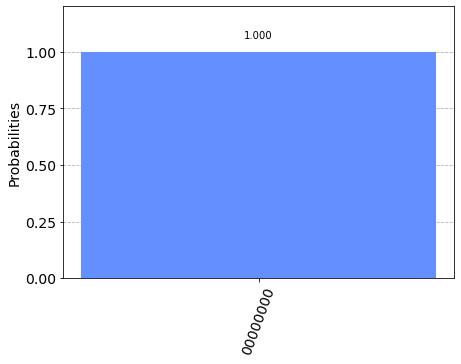

In [12]:
sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc_output)
result = sim.run(qobj).result()

counts = result.get_counts()

plot_histogram(counts)

In [13]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [14]:
qc = qc_encode + qc_output
qc.draw()

<ipython-input-14-ad98d0e2b0e2>:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc_encode + qc_output
/home/iakov/anaconda3/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
           ║ └╥┘┌─┐               
q_2: ──────╫──╫─┤M├───────────────
           ║  ║ └╥┘┌─┐            
q_3: ──────╫──╫──╫─┤M├────────────
           ║  ║  ║ └╥┘┌─┐         
q_4: ──────╫──╫──╫──╫─┤M├─────────
           ║  ║  ║  ║ └╥┘┌─┐      
q_5: ──────╫──╫──╫──╫──╫─┤M├──────
           ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ──────╫──╫──╫──╫──╫──╫─┤M├───
     ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6  7

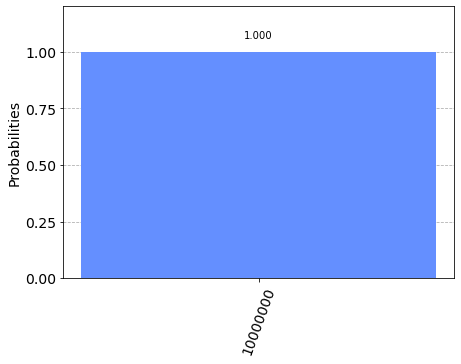

In [15]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [16]:
qc_encode = QuantumCircuit(n)
qc_encode.x(2)
qc_encode.x(0)
qc_encode.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
          
q_7: ─────

In [17]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0, 1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [18]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [19]:
qc_ha = QuantumCircuit(4, 2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
qc_ha.measure(2, 0)
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [20]:
qc_ha = QuantumCircuit(4, 2)
#кодируем данные для кубитов 0 и 1
qc_ha.x(0) # для а = 0, удалите строку, для а=1 оставь это 
qc_ha.x(1) # для б = 0, удалить, б = 1 оставить
qc_ha.barrier()
#использовать chots для записи XOR на кубите 2
qc_ha.cx(0, 2)
qc_ha.cx(1, 2)
#используем ccx для записи И на входе кубита 3
qc_ha.ccx(0, 1, 3)
qc_ha.barrier()
#извлекаем выходы 
qc_ha.measure(2, 0) # извлекает значение XOR
qc_ha.measure(3, 1) # извлекает значение AND
qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

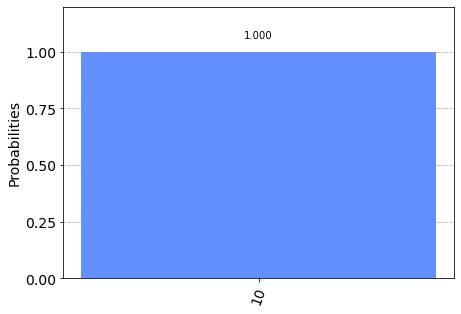

In [25]:
qobj = assemble(qc_ha)#собираем в кучу
counts1 = sim.run(qobj).result().get_counts()
plot_histogram(counts1)

In [26]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.2', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.12.3', 'qiskit-aqua': '0.9.1', 'qiskit': '0.25.4', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}